In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../') # refractive is not in my default path. Change it according to your

from refractive import water
from refractive import ice

In [2]:
Temperature = np.array(266.0)
Frequencies = np.linspace(1.0e9,250.0e9,1000)

n_wat = water.n(Temperature, Frequencies, model='Turner')
n_ice =   ice.n(Temperature, Frequencies)
ni_wb = ice.n(Temperature,Frequencies,model='Warren_2008')
ni_iy = ice.n(Temperature,Frequencies,model='Iwabuchi_2011')
ni_iy.shape

(1000,)

Now plot the results. 

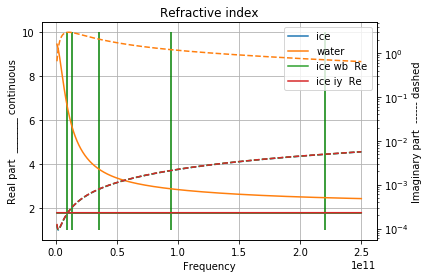

In [3]:
f, ax = plt.subplots()
ax.plot(Frequencies, n_ice.real,label='ice')
ax.plot(Frequencies, n_wat.real,label='water')
ax.plot(Frequencies, ni_wb.real,label='ice wb  Re')
ax.plot(Frequencies, ni_iy.real,label='ice iy  Re')
ax.legend()
ax.grid()
ax.set_ylabel('Real part  _______ continuous')
ax.vlines([9.6e9,13.6e9,35.6e9,94.0e9,220.0e9],ymin=1,ymax=10,colors='g')
axt = ax.twinx()
axt.plot(Frequencies, n_ice.imag,'--',label='ice   Im')
axt.plot(Frequencies, n_wat.imag,'--',label='water Im')
axt.plot(Frequencies, ni_wb.imag,'--',label='ice wb Im')
axt.plot(Frequencies, ni_iy.imag,'--',label='ice iy Im')
axt.set_yscale('log')
#axt.legend()
axt.set_ylabel('Imaginary part  ------ dashed')
ax.set_title('Refractive index')
ax.set_xlabel('Frequency')
plt.savefig('refractive_indexes.pdf')

Highlight the differences between Matzler and Warren 2008 model

Text(0.5,1,'Refractive index')

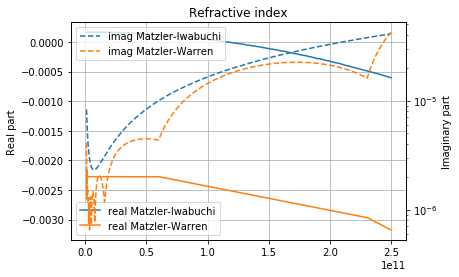

In [4]:
f, ax = plt.subplots()
ax.plot(Frequencies, n_ice.real-ni_iy.real,label='real Matzler-Iwabuchi')
ax.plot(Frequencies, n_ice.real-ni_wb.real,label='real Matzler-Warren')
ax.legend()
ax.grid()
ax.set_ylabel('Real part')
axt = ax.twinx()
axt.plot(Frequencies, abs(n_ice.imag-ni_iy.imag),'--',label='imag Matzler-Iwabuchi')
axt.plot(Frequencies, abs(n_ice.imag-ni_wb.imag),'--',label='imag Matzler-Warren')
axt.set_yscale('log')
axt.legend()
axt.set_ylabel('Imaginary part')
ax.set_title('Refractive index')

And Iwabuchi vs Warren at 266 K 

(1000,) (1000,)


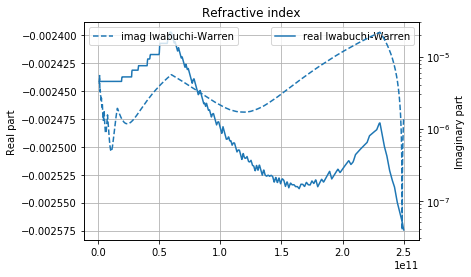

In [5]:
f, ax = plt.subplots()
ax.plot(Frequencies, ni_iy.real-ni_wb.real,label='real Iwabuchi-Warren')
ax.legend()
ax.grid()
ax.set_ylabel('Real part')
axt = ax.twinx()
axt.plot(Frequencies, abs(ni_iy.imag-ni_wb.imag),'--',label='imag Iwabuchi-Warren')
axt.set_yscale('log')
axt.legend()
axt.set_ylabel('Imaginary part')
ax.set_title('Refractive index')
print(ni_iy.shape,ni_wb.shape)

In [6]:
Temps = np.linspace(240.0,270.0,3)
Freqs = np.linspace(1.0e9,250.0e9,3)

Tv, Fv = np.meshgrid(Temps, Freqs, sparse=False)

ni_ma = ice.n(Tv,Fv)
ni_iy = ice.n(Tv,Fv,model='Iwabuchi_2011')
print(ni_ma.shape,ni_iy.shape)
print(len(ni_ma.shape),len(ni_iy.shape))
print(ni_ma)
print(ni_iy)

(3, 3) (3, 3)
2 2
[[ 1.77718035 +2.18656897e-05j  1.78101656 +5.30473261e-05j
   1.78484454 +1.61747958e-04j]
 [ 1.77718129 +1.82320231e-03j  1.78101804 +2.28944074e-03j
   1.78484709 +3.02267579e-03j]
 [ 1.77718414 +3.66992655e-03j  1.78102250 +4.59827443e-03j
   1.78485481 +6.05758440e-03j]]
[[ 1.77701000 +2.18657774e-05j  1.77701000 +2.18657774e-05j
   1.77701000 +2.18657774e-05j]
 [ 1.78113041 +2.30407094e-03j  1.78113041 +2.30407094e-03j
   1.78113041 +2.30407094e-03j]
 [ 1.78537460 +6.05760737e-03j  1.78537460 +6.05760737e-03j
   1.78537460 +6.05760737e-03j]]


In [7]:
ni_iy

array([[ 1.77701000 +2.18657774e-05j,  1.77701000 +2.18657774e-05j,
         1.77701000 +2.18657774e-05j],
       [ 1.78113041 +2.30407094e-03j,  1.78113041 +2.30407094e-03j,
         1.78113041 +2.30407094e-03j],
       [ 1.78537460 +6.05760737e-03j,  1.78537460 +6.05760737e-03j,
         1.78537460 +6.05760737e-03j]])

In [8]:
ice.n(273,[9.6e9,13.6e9,35.6e9,94.0e9,220.0e9])

array([ 1.78560916+0.00026401j,  1.78560918+0.00036085j,
        1.78560937+0.00091544j,  1.78561076+0.00240819j,
        1.78561811+0.00566081j])

In [9]:
water.n(273.15,[9.6e9,13.6e9,35.6e9,94.0e9,220.0e9])

array([ 7.20396032+2.84888299j,  6.28184236+3.00650505j,
        4.04978248+2.41907579j,  2.88972944+1.43298119j,
        2.44549092+0.87894415j])

In [10]:
water.n(273.15,[9.6e9,13.6e9,35.6e9,94.0e9,220.0e9],model='Turner')

array([ 7.18366385+2.81899899j,  6.27116866+2.95723037j,
        4.10380238+2.3432622j ,  2.99475410+1.39532188j,
        2.52007199+0.83380238j])

In [11]:
water.n([273.15,275,280,285,290],[9.6e9,13.6e9,35.6e9,94.0e9,220.0e9])

array([ 7.20396032+2.84888299j,  6.43541591+2.97858153j,
        4.44894012+2.59362783j,  3.20658189+1.74998783j,
        2.62637008+1.16455438j])

In [12]:
water.n([273.15,275,280,285,290],220.0e9)

array([ 2.44549092+0.87894415j,  2.47050341+0.9064987j ,
        2.52943476+0.98829545j,  2.58001110+1.07634155j,
        2.62637008+1.16455438j])

In [13]:
water.n([273.15,275,280,285,290],[9.6e9,13.6e9,35.6e9,94.0e9,220.0e9],model='Turner')

array([ 7.18366385+2.81899899j,  6.42180866+2.93807862j,
        4.46575773+2.54495805j,  3.23585322+1.71589335j,
        2.66011677+1.12726095j])

In [14]:
water.n([273.15,275,280,285,290],220.0e9,model='Turner')

array([ 2.52007199+0.83380238j,  2.53461042+0.86643866j,
        2.57506629+0.95386023j,  2.61687295+1.04064937j,
        2.66011677+1.12726095j])

Text(0.5,0,'Frequency')

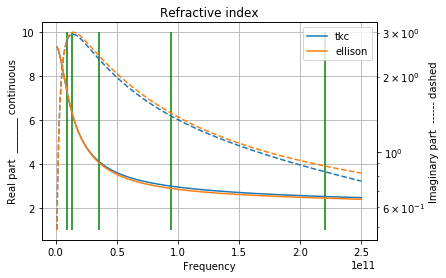

In [15]:
Temperature = np.array(273.15)
Frequencies = np.linspace(1.0e9,250.0e9,1000)

nw_t = water.n(Temperature, Frequencies, model='Turner')
nw_e = water.n(Temperature,Frequencies,model='ellison')

f, ax = plt.subplots()
ax.plot(Frequencies, nw_t.real,label='tkc')
ax.plot(Frequencies, nw_e.real,label='ellison')
#ax.plot(Frequencies, ni_wb.real,label='ice wb  Re')
#ax.plot(Frequencies, ni_iy.real,label='ice iy  Re')
ax.legend()
ax.grid()
ax.set_ylabel('Real part  _______ continuous')
ax.vlines([9.6e9,13.6e9,35.6e9,94.0e9,220.0e9],ymin=1,ymax=10,colors='g')
axt = ax.twinx()
axt.plot(Frequencies, nw_t.imag,'--')
axt.plot(Frequencies, nw_e.imag,'--')
#axt.plot(Frequencies, ni_wb.imag,'--',label='ice wb Im')
#axt.plot(Frequencies, ni_iy.imag,'--',label='ice iy Im')
axt.set_yscale('log')
#axt.legend()
axt.set_ylabel('Imaginary part  ------ dashed')
ax.set_title('Refractive index')
ax.set_xlabel('Frequency')

Text(0.5,1,'Refractive index')

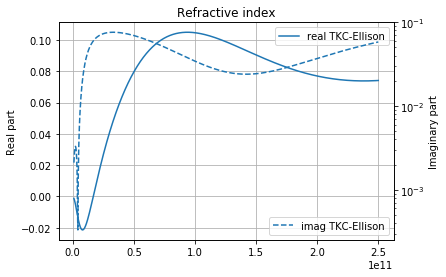

In [16]:
f, ax = plt.subplots()
ax.plot(Frequencies, nw_t.real-nw_e.real,label='real TKC-Ellison')
ax.legend()
ax.grid()
ax.set_ylabel('Real part')
axt = ax.twinx()
axt.plot(Frequencies, abs(nw_t.imag-nw_e.imag),'--',label='imag TKC-Ellison')
axt.set_yscale('log')
axt.legend()
axt.set_ylabel('Imaginary part')
ax.set_title('Refractive index')

#### Temperature dependence of water refractive index

Text(0,0.5,'Imaginary part')

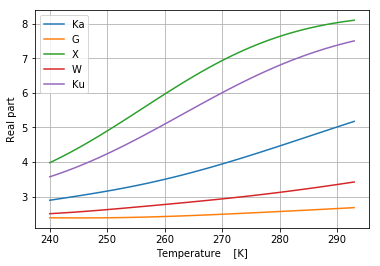

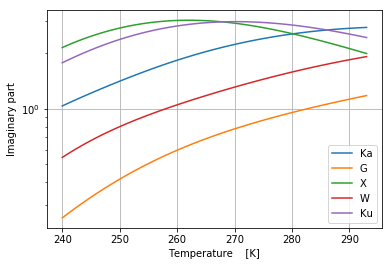

In [17]:
Temperature = np.linspace(240,293,100)
Frequencies = {'X':9.6e9,'Ku':13.6e9,'Ka':35.6e9,'W':94.0e9,'G':220.0e9}

fr, axr = plt.subplots()
fi, axi = plt.subplots()
for fk in Frequencies.keys():
    f = Frequencies[fk]
    nw_t = water.n(Temperature, f, model='Turner')
    axr.plot(Temperature, nw_t.real,label=fk)
    axi.plot(Temperature, nw_t.imag,label=fk)
axr.legend()
axr.grid()
axr.set_xlabel('Temperature    [K]')
axi.set_xlabel('Temperature    [K]')
axi.legend()
axi.grid()

axr.set_ylabel('Real part')
axi.set_yscale('log')
axi.set_ylabel('Imaginary part')
#axr.set_title('Refractive index')
